In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 10)

In [14]:
arr = np.load('data/output/test.npz')

<AxesSubplot:>

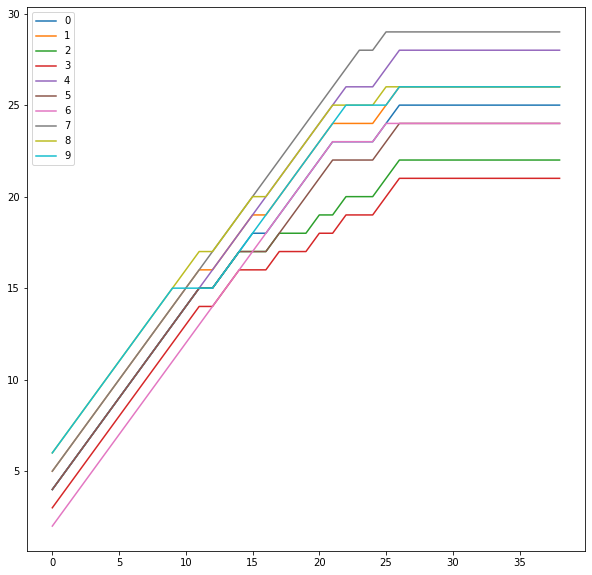

In [103]:
arr = np.load("data/output/num_routes_history2.npz")
data = pd.DataFrame(np.transpose(arr))
sns.lineplot(data=data, dashes=False)

<AxesSubplot:>

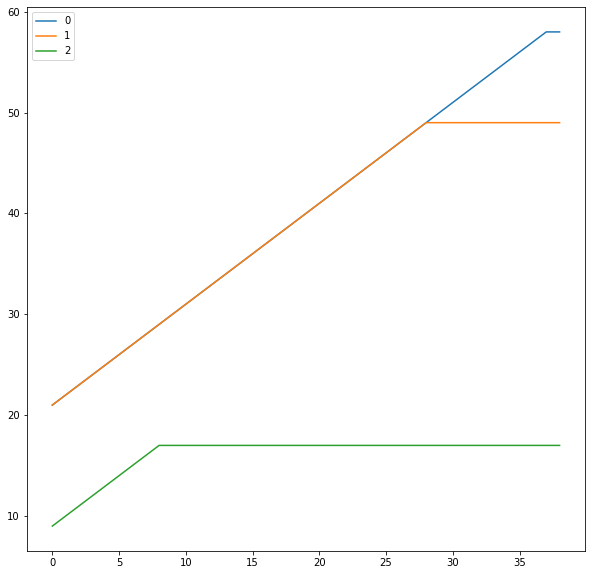

In [102]:
arr = np.load("data/output/fire_plans_history2.npz")
data = pd.DataFrame(np.transpose(arr))
sns.lineplot(data=data, dashes=False)

<AxesSubplot:>

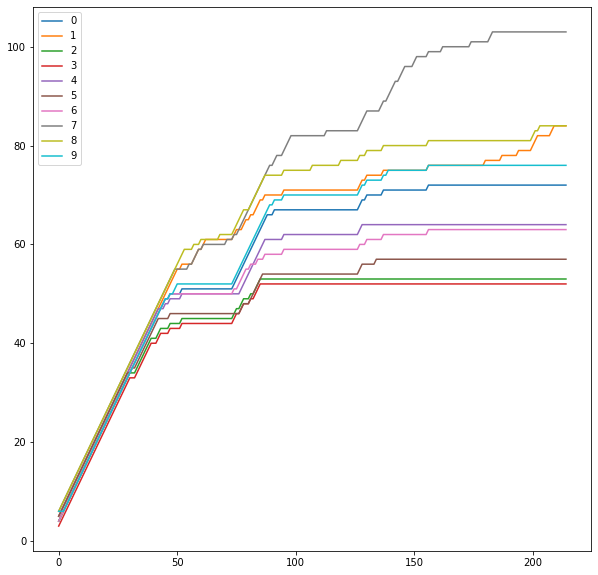

In [19]:
data = pd.DataFrame(np.transpose(arr))
sns.lineplot(data=data, dashes=False)

In [67]:
rho_history = np.load("data/output/rho_history.npz")

In [59]:
suppression_history = np.load("data/output/suppression_history.npz")

array([[0.        , 0.        , 0.        , 0.        , 3.        ,
        7.        , 8.        , 8.        , 8.        , 5.        ,
        2.72559055, 0.        , 0.        , 0.        ],
       [0.        , 7.        , 9.        , 9.        , 4.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        ],
       [9.        , 2.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [56]:
import imageio
import os

In [63]:
def gif(arr, name):

    filenames = []
    for i in range(141):

        # plot the line chart
        plt.imshow(arr[:, :, i])

        plt.clim(0, np.max(arr))
        plt.colorbar(orientation='horizontal')

        # create file name and append it to a list
        filename = f'{i}.png'
        filenames.append(filename)

        # save frame
        plt.savefig(filename)
        plt.close()
    # build gif
    with imageio.get_writer(name, mode='I') as writer:
        for filename in filenames:
            image = imageio.imread(filename)
            writer.append_data(image)

    # Remove files
    for filename in set(filenames):
        os.remove(filename)

In [72]:
rho_history[:, :, 50]

array([[1.96316996e+04, 1.15552079e+04, 8.83076835e+03, 8.10407290e+03,
        6.50437379e+03, 5.44799644e+03, 4.54636237e+03, 3.75886246e+03,
        2.78386718e+03, 1.69969911e+03, 3.63855874e+02, 4.93086442e+00,
        0.00000000e+00, 9.97643610e+00],
       [1.33043738e+04, 1.16043738e+04, 9.90437379e+03, 8.20437379e+03,
        6.50437379e+03, 5.23110328e+03, 3.90000000e+03, 3.76897537e+03,
        2.68356629e+03, 1.80000000e+03, 2.00000000e+02, 0.00000000e+00,
        5.45696821e-12, 7.27595761e-12],
       [2.01328345e+04, 1.17577311e+04, 1.00232362e+04, 1.01027137e+03,
        2.26254839e+02, 1.23652621e+03, 1.46278104e+03, 1.01027137e+03,
        1.46278104e+03, 1.01027137e+03, 0.00000000e+00, 4.52509678e+02,
        2.26254839e+02, 0.00000000e+00]])

In [62]:
filenames = []
for i in range(141):
    
    # plot the line chart
    plt.imshow(np.log(rho_history[:, :, i]))

    plt.clim(0, np.max(arr))
    plt.colorbar(orientation='horizontal')
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer(name, mode='I') as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)

NameError: name 'name' is not defined

In [64]:
gif(suppression_history, 'suppression_history.gif')

In [52]:
np.max(np.log(rho_haistory))

13.605320489058192

In [100]:
name = 'suppression_history.gif'
filenames = []
for i in range(suppression_history.shape[2]):
    
    # plot the line chart
    fig, ax = plt.subplots(2)

    ax[0].plot(range(1, 15), suppression_history[0, :, i], label='Fire 1')
    ax[0].plot(range(1, 15), suppression_history[1, :, i], label='Fire 2')
    ax[0].plot(range(1, 15), suppression_history[2, :, i], label='Fire 3')
    ax[0].legend()
    ax[0].set_title(f'Crews at each fire over time after CG iteration {i}')

    ax[1].plot(range(1, 15), suppression_history[0, :, -1], label='Fire 1')
    ax[1].plot(range(1, 15), suppression_history[1, :, -1], label='Fire 2')
    ax[1].plot(range(1, 15), suppression_history[2, :, -1], label='Fire 3')
    ax[1].legend()
    ax[1].set_title(f'Crews at each fire over time at termination')
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with imageio.get_writer(name, mode='I') as writer:
    for ix, filename in enumerate(filenames):
        image = imageio.imread(filename)
        writer.append_data(image)
        if ix == len(filenames) - 1:
            for i in range(50):
                writer.append_data(image)
            
        
        
# Remove files
for filename in set(filenames):
    os.remove(filename)
    

plt.show()

Text(0.5, 1.0, 'Crews at each fire over time at termination')

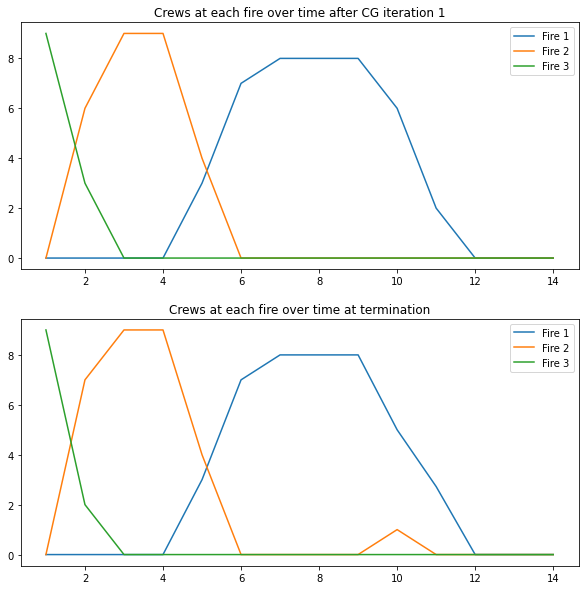

In [98]:
fig, ax = plt.subplots(2)

i = 1
ax[0].plot(range(1, 15), suppression_history[0, :, i], label='Fire 1')
ax[0].plot(range(1, 15), suppression_history[1, :, i], label='Fire 2')
ax[0].plot(range(1, 15), suppression_history[2, :, i], label='Fire 3')
ax[0].legend()
ax[0].set_title(f'Crews at each fire over time after CG iteration {i}')

ax[1].plot(range(1, 15), suppression_history[0, :, -1], label='Fire 1')
ax[1].plot(range(1, 15), suppression_history[1, :, -1], label='Fire 2')
ax[1].plot(range(1, 15), suppression_history[2, :, -1], label='Fire 3')
ax[1].legend()
ax[1].set_title(f'Crews at each fire over time at termination')

In [16]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help